<a href="https://colab.research.google.com/github/mariahelenass/NLP/blob/main/an%C3%A1lise_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q spacy==2.2.3

## Análise de Sentimentos

In [7]:
import spacy

In [8]:
import pandas as pd
import string
import random
import seaborn as sns
import numpy as npa

In [9]:
dados = pd.read_csv('/content/base_treinamento.txt', encoding='utf-8')

In [10]:
dados.shape

(196, 2)

In [11]:
dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [12]:
dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


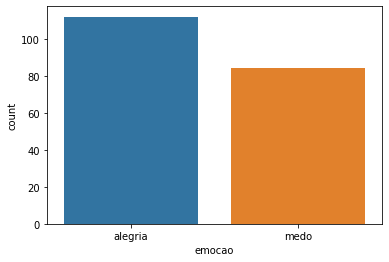

In [14]:
sns.countplot(dados['emocao'], label = 'Contagem');

In [15]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
from spacy.lang.pt.stop_words import STOP_WORDS

stop_words = STOP_WORDS
# print(stop_words)

In [33]:
nlp = spacy.blank('pt')

In [34]:
def preprocessamento(texto):
    texto = texto.lower()
    documento = nlp(texto)

    lista = []

    for token in documento:
        # lista.append(token.text)
        lista.append(token.lemma_)
    
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    return lista

In [35]:
dados['texto'] = dados['texto'].apply(preprocessamento)

In [36]:
dados.head()

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar aconchego,alegria
2,fiz a adesão a o curso hoje,alegria
3,admirada,alegria
4,adoro,alegria


In [37]:
dados_final = []
for texto, emocao in zip(dados['texto'], dados['emocao']):
    # print(texto, emocao)
    if emocao == 'alegria':
        dic = ({'ALEGRIA': True, 'MEDO': False})
    elif emocao == 'medo':
        dic = ({'ALEGRIA': False, 'MEDO': True})

    dados_final.append([texto, dic.copy()])

In [38]:
len(dados_final)

196

In [39]:
dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz a adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirada', {'ALEGRIA': True, 'MEDO': False}],
 ['adoro', {'ALEGRIA': True, 'MEDO': False}],
 ['adoro cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adoro a cor olhos', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amáveis o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['agradar filhos', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amado', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['a dor amenizando finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['acho apaixonei', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentindo animada', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto hoje', {'ALEGRIA': True, '

In [40]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label('ALEGRIA')
categorias.add_label('MEDO')
modelo.add_pipe(categorias)
historico = []

In [45]:
import json

In [48]:
modelo.begin_training()
for epoch in range(1000):
  random.shuffle(dados_final) # misturar base de dados
  losses = {}
  for batch in spacy.util.minibatch(dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
  if epoch % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 0.007616500603035092}
{'textcat': 3.572075080171544e-08}
{'textcat': 1.3468073545297443e-08}
{'textcat': 7.084675679447372e-09}
{'textcat': 4.439353579188676e-09}
{'textcat': 3.0629432601347872e-09}
{'textcat': 2.4829801548165165e-09}
{'textcat': 2.0213238582922344e-09}
{'textcat': 1.5742178532951456e-09}
{'textcat': 1.389326875766983e-09}


In [49]:
historico

[{'textcat': 0.007616500603035092},
 {'textcat': 3.572075080171544e-08},
 {'textcat': 1.3468073545297443e-08},
 {'textcat': 7.084675679447372e-09},
 {'textcat': 4.439353579188676e-09},
 {'textcat': 3.0629432601347872e-09},
 {'textcat': 2.4829801548165165e-09},
 {'textcat': 2.0213238582922344e-09},
 {'textcat': 1.5742178532951456e-09},
 {'textcat': 1.389326875766983e-09}]

In [52]:
historico_losses = []
for i in historico:
  historico_losses.append(i.get('textcat'))

In [53]:
historico_losses = npa.array(historico_losses)

Text(0, 0.5, 'Erro')

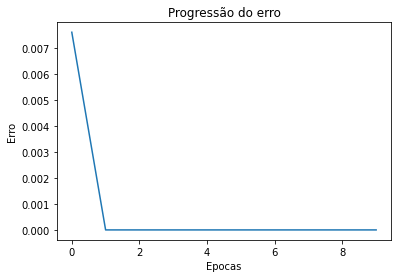

In [54]:
import matplotlib.pyplot as plt

plt.plot(historico_losses)
plt.title('Progressão do erro')
plt.xlabel('Epocas')
plt.ylabel('Erro')

In [55]:
modelo.to_disk('modelo')

### Testes com frase

In [118]:
modelo_carregado = spacy.load("modelo")

In [119]:
modelo_carregado

In [120]:
texto_positivo = 'Eu amo assistir o jogo do Corinthians'

In [121]:
texto_positivo = preprocessamento(texto_positivo)

In [122]:
texto_positivo

'amo assistir o jogo corinthians'

In [123]:
previsao = modelo_carregado(texto_positivo)

In [124]:
previsao

amo assistir o jogo corinthians

In [125]:
previsao.cats

{'ALEGRIA': 0.9999284744262695, 'MEDO': 0.0008605840266682208}

In [126]:
texto_negativo = 'Odiei o árbitro do jogo'

In [127]:
texto_negativo = preprocessamento(texto_negativo)

In [128]:
texto_negativo

'odiei o árbitro jogo'

In [129]:
previsao = modelo_carregado(texto_negativo)

In [130]:
previsao.cats

{'ALEGRIA': 0.9888155460357666, 'MEDO': 0.05549954995512962}

## Avaliação base de treinamento

In [131]:
previsoes = []
for texto in dados['texto']:
  # print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [132]:
previsoes

[{'ALEGRIA': 0.9999545812606812, 'MEDO': 0.0001445020316168666},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 0.0004734348913189024},
 {'ALEGRIA': 0.9999414682388306, 'MEDO': 0.0004563347902148962},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 0.00014927497250027955},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 9.790744661586359e-05},
 {'ALEGRIA': 0.9998177886009216, 'MEDO': 0.00024130500969476998},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 0.00024259753990918398},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 0.00027308514108881354},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 0.00010218695388175547},
 {'ALEGRIA': 0.9999477863311768, 'MEDO': 0.00017224493785761297},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 5.781053550890647e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 0.0003319786046631634},
 {'ALEGRIA': 0.9999

In [133]:
previsao_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsao_final.append('alegria')
  else:
     previsao_final.append('medo')

In [134]:
previsao_final

['alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'alegria',
 'al

In [135]:
real = dados['emocao'].values

In [136]:
import sklearn 
from sklearn.metrics import confusion_matrix, accuracy_score

In [137]:
confusion_matrix(real, previsao_final)

array([[112,   0],
       [  0,  84]])

In [138]:
accuracy_score(real, previsao_final)

1.0

## Avaliação da base de teste

In [139]:
base_teste = pd.read_csv('/content/base_teste.txt')

In [140]:
base_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [141]:
base_teste['texto'] = base_teste['texto'].apply(preprocessamento)

In [142]:
base_teste.head()

,texto,emocao
0,precisei pagar o ingresso,alegria
1,ajeitar fica,alegria
2,fortuna ultrapassará a,alegria
3,afortunado,alegria
4,benéfico medida,alegria


In [143]:
previsoes = []
for texto in base_teste['texto']:
  # print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [144]:
previsao_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsao_final.append('alegria')
  else:
     previsao_final.append('medo')

In [145]:
real_teste = base_teste['emocao'].values

In [146]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [147]:
accuracy_score(real_teste, previsao_final)

0.5119047619047619

In [148]:
confusion_matrix(real_teste, previsao_final)

array([[32, 16],
       [25, 11]])